# Tutorial
Here is how to use the `bids_selector` module (which is still under development).
The first thing to know is that the main object you will be dealing with is a BidsArchitecture.
As indicated in its name, the object will provide a view of the architecture of the dataset as a function of the user input.
The database is basically all the files parsed into a pandas dataframe. And it is from this dataframe I will work on.
For example if we want a list of all the eeg data which is a `pickle` object (extension `.pkl`) we will input the object as follow:

In [41]:
from pathlib import Path
from eeg_research.system.bids_selector  import BidsArchitecture
import os
root = Path("/data2/Projects/eeg_fmri_natview/derivatives")
architecture = BidsArchitecture(
    root = root,
    datatype='eeg',
    suffix='eeg',
    extension = '.pkl'
)


In [42]:
architecture.database.to_csv('test_database.csv')

In [46]:
# Find subjects with both session 1 and session 2
df = architecture.database
subjects_with_both_sessions = df.groupby('subject')['task'].nunique()

subjects_with_both_sessions = subjects_with_both_sessions[subjects_with_both_sessions == 2].index



# Filter the dataframe to include only these subjects

df_filtered = df[df['subject'].isin(subjects_with_both_sessions)]


In [52]:
df.groupby('task')['run'].nunique()

task
checker     1
dme         2
dmh         2
inscapes    1
monkey1     2
monkey2     2
monkey5     2
peer        1
rest        1
tp          2
Name: run, dtype: int64

/tmp/ipykernel_3015282/2297978126.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(architecture.database[x].unique(),rotation = 45)


Text(0.5, 0, 'Task')

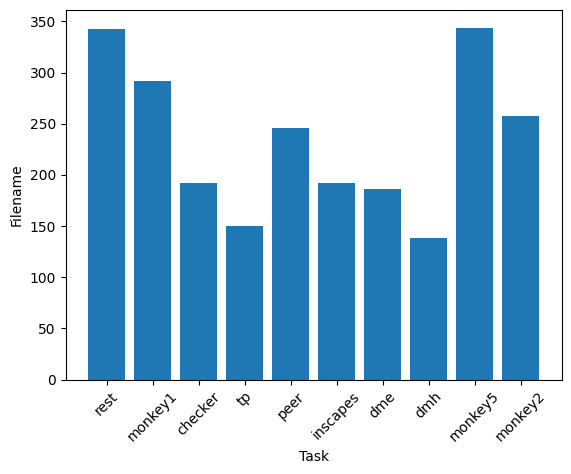

In [61]:
import matplotlib.pyplot as plt
x = 'task'
y = 'filename'
plt.bar(architecture.database[x].unique(),df.groupby(x)[y].nunique())
plt.gca().set_xticklabels(architecture.database[x].unique(),rotation = 45)
plt.ylabel(y.capitalize())
plt.xlabel(x.capitalize())

In [40]:
architecture.database.groupby([x,'task']).count()

root  subject  datatype  run  acquisition  description  \
session task                                                              
01      checker    22       22        22   22            0           22   
        rest       22       22        22   22            0           22   
02      checker    17       17        17   17            0           17   
        rest       17       17        17   17            0           17   
03      checker     1        1         1    1            0            1   
        rest        1        1         1    1            0            1   

                 suffix  extension  atime  mtime  ctime  filename  
session task                                                       
01      checker      22         22     22     22     22        22  
        rest         22         22     22     22     22        22  
02      checker      17         17     17     17     17        17  
        rest         17         17     17     17     17        17  
03      checker       1          1      1      1      1         1  
        rest          1          1      1      1      1         1

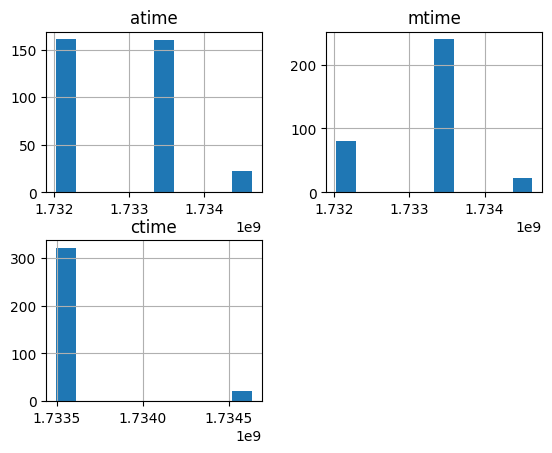

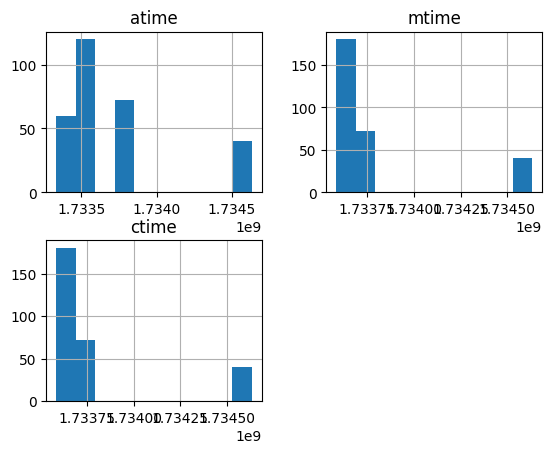

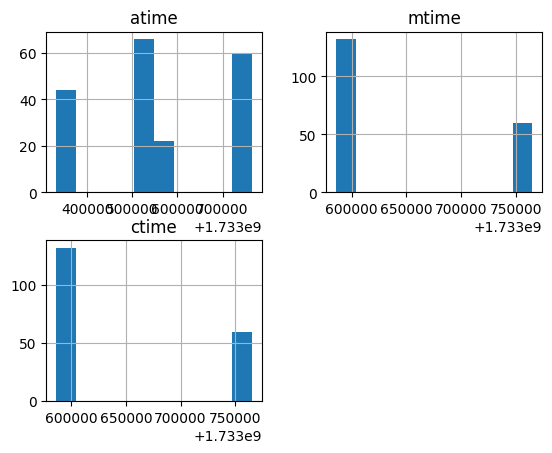

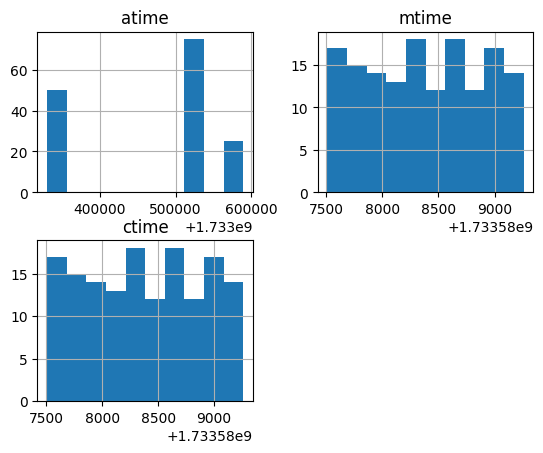

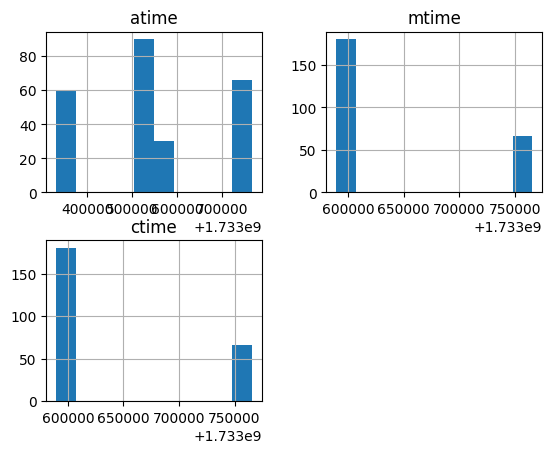

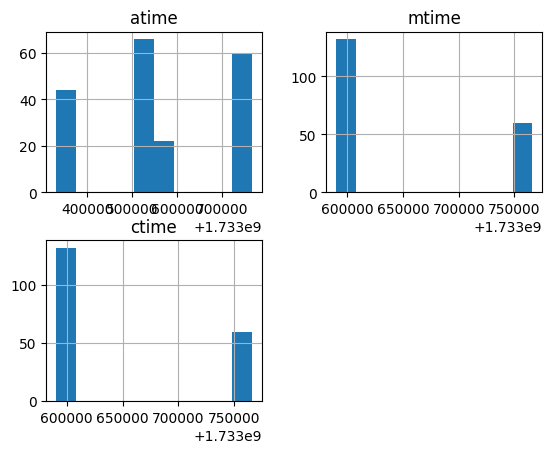

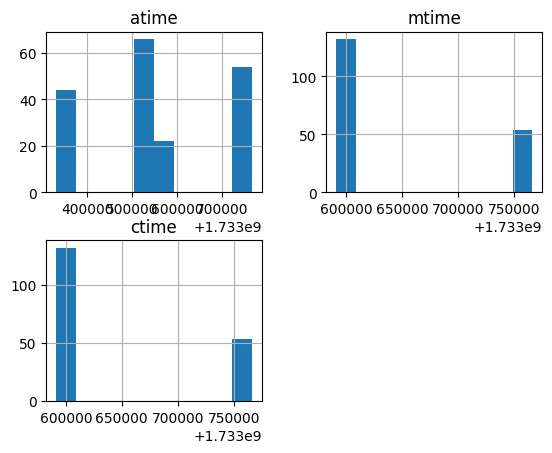

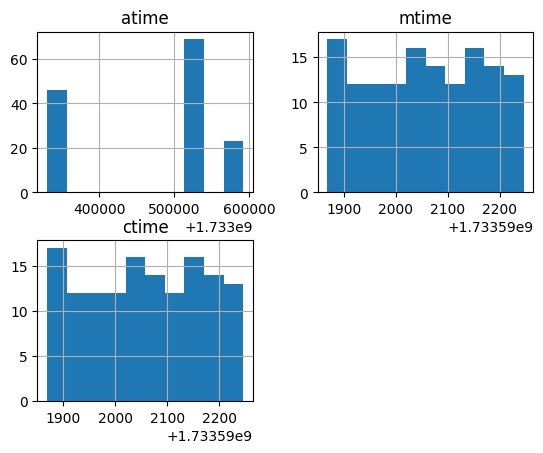

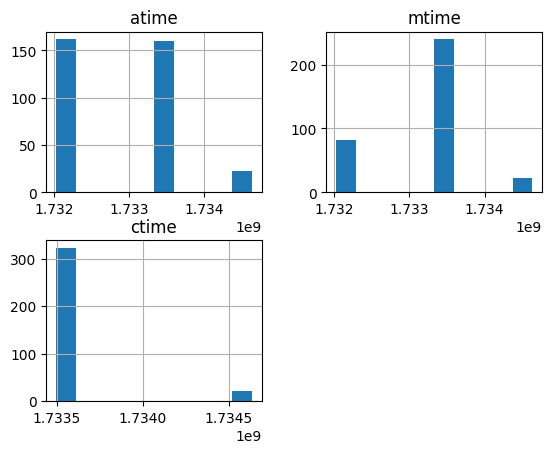

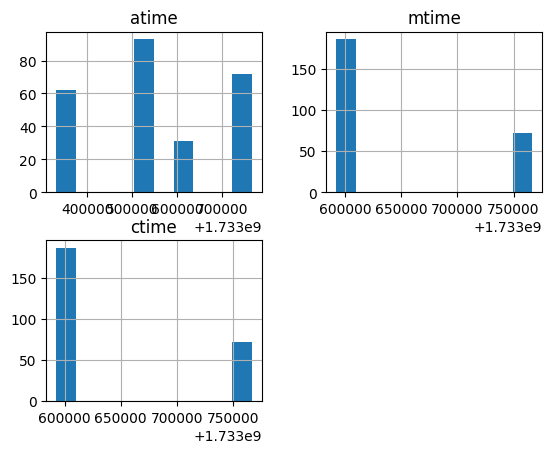

In [10]:
s = architecture.database.groupb

In [3]:
selection = architecture.select(subject = "01")

In [4]:
selection.database

,root,subject,session,datatype,task,run,acquisition,description,suffix,extension,atime,mtime,ctime,filename
0,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,rest,01,None,GfpBk,eeg,.pkl,1733527515,1733583482,1733583482,/data2/Projects/eeg_fmri_natview/derivatives/s...
1,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,02,None,GfpBk,eeg,.pkl,1733527888,1733590067,1733590067,/data2/Projects/eeg_fmri_natview/derivatives/s...
2,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,checker,01,None,CustomGfpBk,eeg,.pkl,1733528208,1733580755,1733580755,/data2/Projects/eeg_fmri_natview/derivatives/s...
3,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,01,None,CustomGfpBk,eeg,.pkl,1733526575,1733589689,1733589689,/data2/Projects/eeg_fmri_natview/derivatives/s...
4,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,02,None,BandsGfpBk,eeg,.pkl,1733527889,1733590068,1733590068,/data2/Projects/eeg_fmri_natview/derivatives/s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,peer,01,None,CustomEnvBk,eeg,.pkl,1733592166,1733592168,1733592168,/data2/Projects/eeg_fmri_natview/derivatives/s...
64,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,rest,01,None,IscBandsEnvBk,eeg,.pkl,1734632852,1734632853,1734632853,/data2/Projects/eeg_fmri_natview/derivatives/s...
65,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,checker,01,None,IscBandsEnvBk,eeg,.pkl,1734633008,1734633009,1734633009,/data2/Projects/eeg_fmri_natview/derivatives/s...
66,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,dme,01,None,IscBandsEnvBk,eeg,.pkl,1734633683,1734633792,1734633792,/data2/Projects/eeg_fmri_natview/derivatives/s...


In [17]:
import copy
import pandas as pd
kwargs = {"subject": "01-05"}

valid_keys = [
        "subject", "session", "datatype", "task", "run",
        "acquisition", "description", "suffix", "extension"
    ]

# Validate keys
for key in kwargs:
    if key not in valid_keys:
        raise ValueError(f"Invalid selection key: {key}")

# Create new instance
new_instance = copy.deepcopy(architecture)

# Build combined mask for all conditions
mask = pd.Series(True, index=architecture.database.index)

for key, value in kwargs.items():
    if value is not None:
        if isinstance(value, list):
            mask &= architecture.database[key].isin(value)
        elif isinstance(value, str):
            value = value.strip()
            if value:  # Skip empty strings
                mask &= architecture._perform_selection(architecture.database[key], value)

In [ ]:
new_instance = new_instance._database.loc[mask]

,root,subject,session,datatype,task,run,acquisition,description,suffix,extension,atime,mtime,ctime,filename
0,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,rest,01,None,GfpBk,eeg,.pkl,1733527515,1733583482,1733583482,/data2/Projects/eeg_fmri_natview/derivatives/s...
1,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,02,None,GfpBk,eeg,.pkl,1733527888,1733590067,1733590067,/data2/Projects/eeg_fmri_natview/derivatives/s...
2,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,checker,01,None,CustomGfpBk,eeg,.pkl,1733528208,1733580755,1733580755,/data2/Projects/eeg_fmri_natview/derivatives/s...
3,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,01,None,CustomGfpBk,eeg,.pkl,1733526575,1733589689,1733589689,/data2/Projects/eeg_fmri_natview/derivatives/s...
4,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,02,None,BandsGfpBk,eeg,.pkl,1733527889,1733590068,1733590068,/data2/Projects/eeg_fmri_natview/derivatives/s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,/data2/Projects/eeg_fmri_natview/derivatives,04,02,eeg,inscapes,01,None,CustomEnvBk,eeg,.pkl,1733588554,1733588564,1733588564,/data2/Projects/eeg_fmri_natview/derivatives/s...
332,/data2/Projects/eeg_fmri_natview/derivatives,04,02,eeg,monkey2,01,None,CustomEnvBk,eeg,.pkl,1733590699,1733590704,1733590704,/data2/Projects/eeg_fmri_natview/derivatives/s...
333,/data2/Projects/eeg_fmri_natview/derivatives,04,02,eeg,monkey2,02,None,CustomEnvBk,eeg,.pkl,1733591058,1733591063,1733591063,/data2/Projects/eeg_fmri_natview/derivatives/s...
334,/data2/Projects/eeg_fmri_natview/derivatives,04,02,eeg,monkey5,01,None,CustomEnvBk,eeg,.pkl,1733591272,1733591277,1733591277,/data2/Projects/eeg_fmri_natview/derivatives/s...


In [19]:
new_instance._

In [7]:
selection.database

,root,subject,session,datatype,task,run,acquisition,description,suffix,extension,atime,mtime,ctime,filename
0,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,rest,01,None,GfpBk,eeg,.pkl,1733527515,1733583482,1733583482,/data2/Projects/eeg_fmri_natview/derivatives/s...
1,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,02,None,GfpBk,eeg,.pkl,1733527888,1733590067,1733590067,/data2/Projects/eeg_fmri_natview/derivatives/s...
2,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,checker,01,None,CustomGfpBk,eeg,.pkl,1733528208,1733580755,1733580755,/data2/Projects/eeg_fmri_natview/derivatives/s...
3,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,01,None,CustomGfpBk,eeg,.pkl,1733526575,1733589689,1733589689,/data2/Projects/eeg_fmri_natview/derivatives/s...
4,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,02,None,BandsGfpBk,eeg,.pkl,1733527889,1733590068,1733590068,/data2/Projects/eeg_fmri_natview/derivatives/s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,/data2/Projects/eeg_fmri_natview/derivatives,19,02,eeg,checker,01,None,BandsEnv,eeg,.pkl,1732032404,1732224976,1733496178,/data2/Projects/eeg_fmri_natview/derivatives/s...
2337,/data2/Projects/eeg_fmri_natview/derivatives,19,02,eeg,rest,01,None,BandsEnv,eeg,.pkl,1732033286,1732224296,1733496178,/data2/Projects/eeg_fmri_natview/derivatives/s...
2338,/data2/Projects/eeg_fmri_natview/derivatives,19,02,eeg,rest,01,None,BandsEnvBk,eeg,.pkl,1732216150,1733582320,1733582320,/data2/Projects/eeg_fmri_natview/derivatives/s...
2339,/data2/Projects/eeg_fmri_natview/derivatives,19,02,eeg,checker,01,None,BandsEnvBk,eeg,.pkl,1732217492,1733580557,1733580557,/data2/Projects/eeg_fmri_natview/derivatives/s...


We can have a view of the desired dataset by getting the attribute `database` of the `architecture` instance:

In [2]:
path = architecture.database.iloc[0]['filename']

In [2]:
import eeg_research.system.bids_selector as selector
from pathlib import Path
f = Path('/data/sub-01/sus-03/sub-01_ses_01_task-rast_runass-01_dsscr-GfpBk_eeg.pkl')
selector.validate_bids_file(f)


NameError: name 'has_standard_name' is not defined

In [10]:
import re
from pathlib import Path
import os

class BidsValidationError(Exception):
    """Custom exception for BIDS validation errors."""
    pass

def validate_bids_file(file: Path):
    """Validate the BIDS filename and pathname."""
    # Define BIDS rules
    valid_datatype_pattern = re.compile(r"^[a-z0-9]+$")
    valid_filename_pattern = re.compile(
        r"^sub-(?P<sub>[\w\d]+)"
        r"(?:_ses-(?P<ses>[\w\d]+))?"
        r"_task-(?P<task>[\w\d]+)"
        r"(?:_acq-(?P<acq>[\w\d]+))?"
        r"(?:_run-(?P<run>[\w\d]+))?"
        r"(?:_recording-(?P<recording>[\w\d]+))?"
        r"_(?P<suffix>[\w]+)?"
        r".(?P<extension>[\w\.]+)$"
    )

    errors = []
    indicators = []

    filename = os.fspath(file.name) if file.suffix else None  # Check if it's a file or folder
    
    if filename:
        root = Path(*file.parent.parts[:-3])
        bids_path_parts = file.parent.parts[-3:-1]
        datatype = file.parent.parts[-1]
    else:
        root = Path(*file.parent.parts[:-2])
        bids_path_parts = file.parent.parts[-2:]
        datatype = file.parts[-1]
        
    if not bids_path_parts[0].startswith("sub-"):
        raise BidsValidationError("Path does not contain any BIDS elements (e.g., 'sub-*').")
    
    # 1. Validate datatype
    print(f"Datatype valid: {valid_datatype_pattern.match(datatype)}")
    if datatype and not valid_datatype_pattern.match(datatype):
        errors.append(f"Invalid datatype: '{datatype}' should be a lowercase alphanumeric string.")
        indicators.append("^" * len(datatype))

    # 2. Validate BIDS path components
    path_pattern = re.compile(r"(sub|ses)-[\w\d]+")
    for part in bids_path_parts:
        print(f"{part} valid: {path_pattern.match(part)}")
        if not path_pattern.match(part):
            errors.append(f"Invalid path component: '{part}' should match the pattern '<key>-<value>' with key being 'sub' or 'ses'.")
            indicators.append("^" * len(part))
        else:
            indicators.append(" " * len(part))

    # 3. Validate filename
    if filename:
        match = valid_filename_pattern.match(filename)
        print(f"Match filename {filename}: {match}")
        if not match:
            errors.append(f"Invalid filename: '{filename}' does not match the expected BIDS format.")
            indicators.append("^" * len(filename))

    # Combine indicators and errors
    error_indicator = " "*(len(os.fspath(root))+1) + " ".join(indicators)
    if errors:
        message = (
            f"Non standardized BIDS name\n{file}\n{error_indicator}\n\n"
            + "\n".join(f"{i + 1}. {error}" for i, error in enumerate(errors))
        )
        raise BidsValidationError(message)

# Example usage
try:
    # Valid file
    f = Path("/data/sub-01/sas-01/eeg/sub-01_ses-01_tqsk-test_acq-fast_run-01_eeg.vhdr")
    validate_bids_file(f)
except BidsValidationError as e:
    raise e

try:
    # Invalid file
    f = Path("/data/sub-01/ses-01/EEG/sub-01_ses-01_task-test_acq-fast_run-01_bad.json")
    validate_bids_file(f)
except BidsValidationError as e:
    raise e


Datatype valid: <re.Match object; span=(0, 3), match='eeg'>
sub-01 valid: <re.Match object; span=(0, 6), match='sub-01'>
sas-01 valid: None
Match filename sub-01_ses-01_tqsk-test_acq-fast_run-01_eeg.vhdr: None


BidsValidationError: Non standardized BIDS name
/data/sub-01/sas-01/eeg/sub-01_ses-01_tqsk-test_acq-fast_run-01_eeg.vhdr
             ^^^^^^ ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1. Invalid path component: 'sas-01' should match the pattern '<key>-<value>' with key being 'sub' or 'ses'.
2. Invalid filename: 'sub-01_ses-01_tqsk-test_acq-fast_run-01_eeg.vhdr' does not match the expected BIDS format.

In [50]:
def validate_bids_file(file: Path):
    """Validate the BIDS filename and pathname."""
    # Define BIDS rules
    valid_keys = {'sub', 'ses', 'task', 'acq', 'run', 'recording', 'desc'}
    valid_datatype_pattern = re.compile(r"^[a-z0-9]+$")
    key_value_pattern = re.compile(r"(?P<key>[a-zA-Z0-9]+)-(?P<value>[a-zA-Z0-9]+)")
    path_pattern = re.compile(r"(sub|ses)-[\w\d]+")  # Added this pattern
    
    errors = []
    
    # Parse file structure
    filename = os.fspath(file.name) if file.suffix else None
    if filename:
        root = Path(*file.parent.parts[:-3])
        bids_path_parts = file.parent.parts[-3:]
        print(bids_path_parts)
        conditions = (
            bids_path_parts[0].startswith("sub"),
            bids_path_parts[2].startswith("ses"),
            "-" in bids_path_parts[0],
            "-" in bids_path_parts[2],
        )
        if not any(conditions):
            raise BidsValidationError(
                "Path does not contain valid BIDS elements (e.g., 'sub-*')."\
                "Should be in the form of 'root/sub-<label>/ses-<label>/<datatype>'"
                                      )
        datatype = file.parent.parts[-2]
    else:
        root = Path(*file.parent.parts[:-2])
        bids_path_parts = file.parent.parts[-2:]
        datatype = file.parts[-1]
    
    # 1. Validate datatype
    if datatype and not valid_datatype_pattern.match(datatype):
        errors.append(f"Invalid datatype: '{datatype}' should be a lowercase alphanumeric string.")
    
    # 2. Validate BIDS path components
    for part in [bids_path_parts[0], bids_path_parts[2]]:
        if not path_pattern.match(part):
            errors.append(f"Invalid path component: '{part}' should match the pattern '<key>-<value>' with key being 'sub' or 'ses'.")
    
    # 3. Validate filename
    if filename:
        name_parts = file.stem.split('_')
        
        for i, part in enumerate(name_parts):
            if i == len(name_parts) - 1:  # Suffix
                continue
            
            match = key_value_pattern.match(part)
            if not match:
                errors.append(f"Invalid format in '{part}': should be '<key>-<value>'")
            else:
                key = match.group("key")
                if key not in valid_keys:
                    errors.append(f"Invalid key '{key}': must be one of {sorted(valid_keys)}")
            
    if errors:
        message = (
            f"Non-standardized BIDS name\n"
            f"{file}\n\n"
            + "\n".join(f"{i + 1}. {error}" for i, error in enumerate(errors))
        )
        raise BidsValidationError(message)
    
    return True

In [1]:
import eeg_research.system.bids_selector as selector
from pathlib import Path
BIDSpath = selector.BidsPath(
    root = Path('/data/truc'),
    subject = '02',
    session = '01',
    task = 'rest',
    datatype = 'eeg',
    run = '01',
    description = '*',
    suffix = 'eeg',
    extension = '.pkl'
)
print(BIDSpath.filename)
print(BIDSpath.basename)
print(BIDSpath.fullpath)


sub-02_ses-01_task-rest_run-01_desc-*_eeg.pkl
sub-02_ses-01_task-rest_run-01_desc-*_eeg
/data/truc/sub-02/ses-01/eeg/sub-02_ses-01_task-rest_run-01_desc-*_eeg.pkl


In [9]:
import eeg_research.system.bids_selector as selector
BIDSpath = selector.BidsArchitecture(
    root = Path('/data/truc'),
    subject = '02',
    task = 'rest',
    suffix = 'eeg',
    extension = '.pkl'
)


In [2]:
from pathlib import Path
import eeg_research.system.bids_selector as selector
selector.validate_bids_file(Path('/data/truc/sub-02/ses-01/eeg/sub-02_ses-01_task-rest_run-01_desc-GfpBk_eeg.pkl'))

('sub-02', 'ses-01', 'eeg')


True

In [6]:
BIDSpath._check_filename(BIDSpath.fullpath)

('sub-02', 'ses-01', 'eeg')


In [8]:
BIDSpath = selector.BidsPath.from_filename(Path('/data/truc/sub-02/ses-01/eeg/sub-02_ses-01_task-rest_run-01_desc-GfpBk_eeg.pkl'))
print(BIDSpath.subject)
print(BIDSpath.session)
print(BIDSpath.task)
print(BIDSpath.run)
print(BIDSpath.description)
print(BIDSpath.datatype)
print(BIDSpath.suffix)
print(BIDSpath.extension)


('sub-02', 'ses-01', 'eeg')
02
01
rest
01
GfpBk
eeg
eeg
.pkl


In [ ]:
BidsArchitecture(

)

In [9]:
f = Path('/data/sub-01/sus-03/sub-01_ses_01_task-rast_runass-01_dsscr-GfpBk_eeg.pkl')
def contain_standard_name(key):
    standard_names = [
    "sub",
    "ses",
    "task",
    "acq",
    "run",
    "record",
    "desc",
    ]
    
    
    return any([name in key for name in standard_names])
standard_names = [
"sub",
"ses",
"task",
"acq",
"run",
"record",
"desc",
]

for name in standard_names:
    if name in f.name:
        elem_boundaries = (f.name.find(name), f.name.find(name) + len(name))
        print(name)
        if f.name[elem_boundaries[1]] != "-":
            print("PROUUUUT")
        

sub
ses
PROUUUUT
task
run
PROUUUUT


In [16]:
import bids_selector
from pathlib import Path
f = Path('/data/sub-01/sus-03/eeg/')#sub-01_ses_01_tusk-rast_run-01_dsc-GfpBk_eeg.pkl')

In [16]:
Path(*f.parent.parts[-2:])

PosixPath('ses-01/eeg')

In [32]:
Path.joinpath

'sub-01_ses_01_tusk-rast_run-01_dsc-GfpBk_eeg'

In [15]:
f.is_file()

False

In [52]:
try:
    indicate_error_in_file(f)
except BidsValidationError as e:
    print(e)

Non standardized BIDS name
sub-01_ses_01_task-rast_ron-01_dsc-GfpBk
       ^   ^            ^      ^        


sub-01_ses_01_task-rast_ron-01_dsc-GfpBk
       ^   ^            ^      ^        


In [15]:
has_standard_name('sub-01') 

True

In [5]:
path.name = 'sub_01_sas-01_tasking-rest_run-01_desc-GfpBk_eeg.pkl'

AttributeError: property 'name' of 'PosixPath' object has no setter

Let's say now we want only the tasks `monkey1`, `inscapes` and `rest`. We will have to call the method `select` of the architecture instance. This method will update internally the database which will then have only the desired selection.

In [3]:
architecture.select(task = ['monkey1','inscapes', 'rest'])

#Let's take a look at the database
architecture.database

,root,subject,session,datatype,task,run,acquisition,description,suffix,extension,filename
0,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,rest,01,None,GfpBk,eeg,.pkl,/data2/Projects/eeg_fmri_natview/derivatives/s...
1,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,02,None,GfpBk,eeg,.pkl,/data2/Projects/eeg_fmri_natview/derivatives/s...
3,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,01,None,CustomGfpBk,eeg,.pkl,/data2/Projects/eeg_fmri_natview/derivatives/s...
4,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,monkey1,02,None,BandsGfpBk,eeg,.pkl,/data2/Projects/eeg_fmri_natview/derivatives/s...
7,/data2/Projects/eeg_fmri_natview/derivatives,01,01,eeg,rest,01,None,Raw,eeg,.pkl,/data2/Projects/eeg_fmri_natview/derivatives/s...
...,...,...,...,...,...,...,...,...,...,...,...
2145,/data2/Projects/eeg_fmri_natview/derivatives,19,02,eeg,rest,01,None,CustomGfpBk,eeg,.pkl,/data2/Projects/eeg_fmri_natview/derivatives/s...
2147,/data2/Projects/eeg_fmri_natview/derivatives,19,02,eeg,rest,01,None,BandsGfpBk,eeg,.pkl,/data2/Projects/eeg_fmri_natview/derivatives/s...
2150,/data2/Projects/eeg_fmri_natview/derivatives,19,02,eeg,rest,01,None,BandsEnv,eeg,.pkl,/data2/Projects/eeg_fmri_natview/derivatives/s...
2151,/data2/Projects/eeg_fmri_natview/derivatives,19,02,eeg,rest,01,None,BandsEnvBk,eeg,.pkl,/data2/Projects/eeg_fmri_natview/derivatives/s...


If we check what are the selected task:

In [4]:
architecture.database['task'].unique()

array(['rest', 'monkey1', 'inscapes'], dtype=object)

The thing is now we can't get another task than the one selected. The BidsArchitecture instance has been overwritten.
However, it is possible to get the specific selection IN another object without modifying the original instance by calling the method `copy()`:

In [5]:
#For this example I have to re-initiate my BidsArchitecture instance because it has been overwritten
root = Path("/data2/Projects/eeg_fmri_natview/derivatives")
architecture = BidsArchitecture(
    root = root,
    datatype='eeg',
    suffix='eeg',
    extension = '.pkl'
)

#Let's perform a selection and put that in another instance now:
selection = architecture.copy().select(task = "checker")



As we can see the `architecture` instance is not modified, we still have all the tasks:

In [6]:
architecture.database['task'].unique()

array(['rest', 'monkey1', 'checker', 'tp', 'peer', 'inscapes', 'dme',
       'dmh', 'monkey5', 'monkey2'], dtype=object)

And the `selection` instance has the desired task:

In [7]:
selection.database['task'].unique()

array(['checker'], dtype=object)

We can also select a desired range of data that has numerical values such as `subject`, `session` or `run`.

In [ ]:
import pickle
data